# **Library Imports**

In [1]:
import re #libray for regular expression
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Loading Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML PROJECTS/3. Spam Detection in Emails/completeSpamAssassin.csv')
df1 = pd.read_csv('/content/drive/MyDrive/ML PROJECTS/3. Spam Detection in Emails/enronSpamSubset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ML PROJECTS/3. Spam Detection in Emails/lingSpam.csv')

In [4]:
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [5]:
df1.head()

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [6]:
df2.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


# **Data Cleaning and Preprocessing**

In [7]:
df = df.drop(columns = 'Unnamed: 0', axis='columns')
df = df[df['Body']!= 'empty']
df1 = df1.drop(columns = ['Unnamed: 0','Unnamed: 0.1']	 , axis='columns')
df2 = df2.drop(columns = 'Unnamed: 0', axis='columns')

In [8]:
final_df = pd.concat([df, df1, df2], ignore_index=True)

In [9]:
final_df['Body'].duplicated().sum()

548

In [10]:
final_df = final_df.drop_duplicates()

In [11]:
final_df['Body'].duplicated().sum()

0

In [12]:
final_df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [13]:
data = final_df.where((pd.notnull(final_df)), '')

In [14]:
data.isna().sum().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 0 to 18117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    17570 non-null  object
 1   Label   17570 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 411.8+ KB


In [15]:
data.shape

(17570, 2)

In [16]:
data.reset_index(drop=True, inplace=True)

# **Text Vecorization**

In [17]:
ps = PorterStemmer()
corpus = []
for index, row in data.iterrows():
  review = re.sub('[^a-zA-Z]', ' ', row['Body'])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [18]:
cv = CountVectorizer(max_features = 6000)
X = cv.fit_transform(corpus).toarray()
y = data ['Label']

In [19]:
len(X), len(y)

(17570, 17570)

# **Train Test Split**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 3)

# **Oversampling**

In [21]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# **Model Training and Performance **

In [22]:
classifiers = {
    "Multinomial Naive Bayes": (MultinomialNB(), {'alpha': [0.5, 1.0, 1.5]}),
    "Logistic Regression": (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]})
}

In [23]:
best_estimators = {}
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
}

Best Parameters for Multinomial Naive Bayes:
 {'alpha': 0.5}
Confusion Matrix for Multinomial Naive Bayes:
 [[2101  108]
 [  69 1236]]
Accuracy Score for Multinomial Naive Bayes: 0.95
Precision for Multinomial Naive Bayes: 0.95
Recall for Multinomial Naive Bayes: 0.95
F1 Score for Multinomial Naive Bayes: 0.95


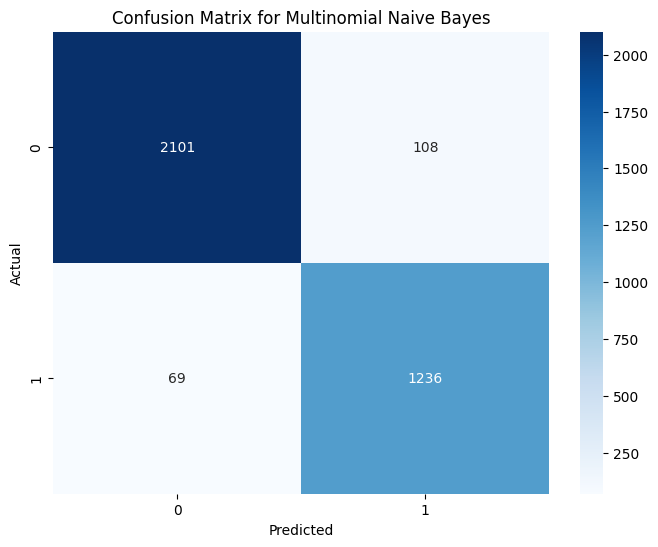

Best Parameters for Logistic Regression:
 {'C': 1}
Confusion Matrix for Logistic Regression:
 [[2131   78]
 [  41 1264]]
Accuracy Score for Logistic Regression: 0.97
Precision for Logistic Regression: 0.97
Recall for Logistic Regression: 0.97
F1 Score for Logistic Regression: 0.97


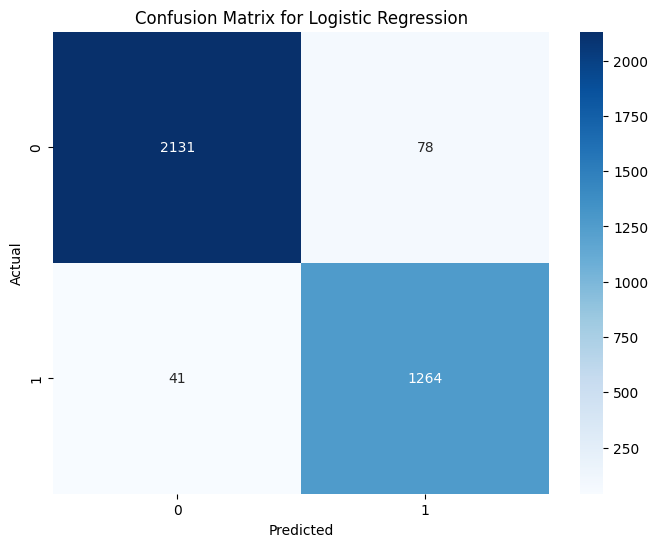

Best Parameters for K-Nearest Neighbors:
 {'n_neighbors': 3}
Confusion Matrix for K-Nearest Neighbors:
 [[1630  579]
 [  24 1281]]
Accuracy Score for K-Nearest Neighbors: 0.83
Precision for K-Nearest Neighbors: 0.88
Recall for K-Nearest Neighbors: 0.83
F1 Score for K-Nearest Neighbors: 0.83


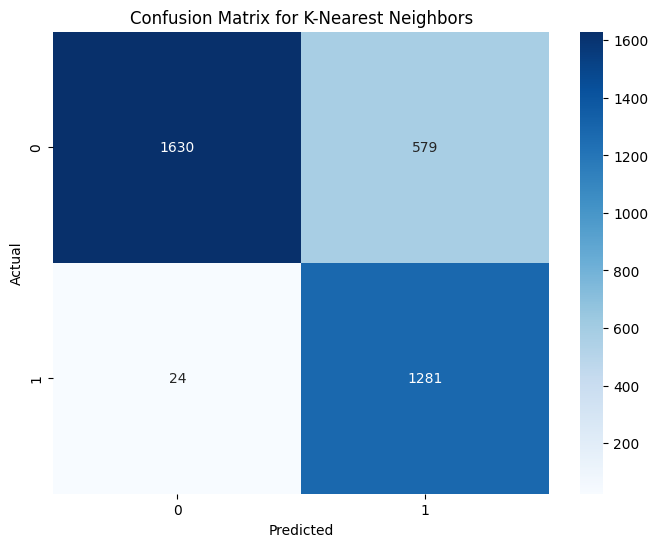

Best Parameters for Decision Tree:
 {'max_depth': None}
Confusion Matrix for Decision Tree:
 [[2072  137]
 [ 124 1181]]
Accuracy Score for Decision Tree: 0.93
Precision for Decision Tree: 0.93
Recall for Decision Tree: 0.93
F1 Score for Decision Tree: 0.93


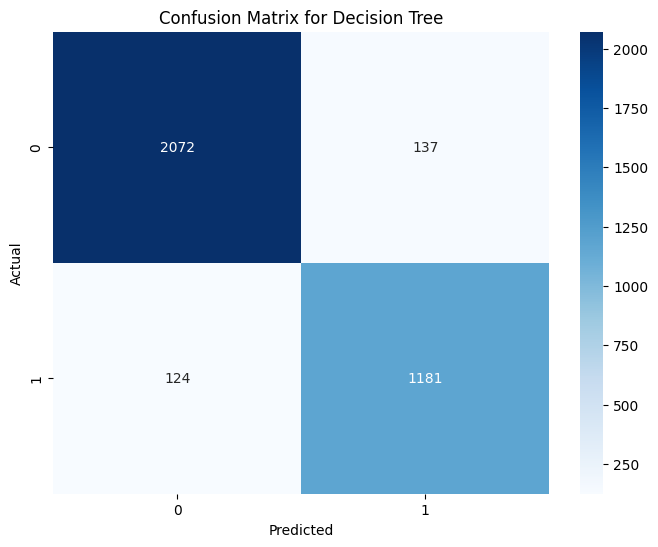

Best Parameters for Random Forest:
 {'max_depth': None, 'n_estimators': 200}
Confusion Matrix for Random Forest:
 [[2161   48]
 [  56 1249]]
Accuracy Score for Random Forest: 0.97
Precision for Random Forest: 0.97
Recall for Random Forest: 0.97
F1 Score for Random Forest: 0.97


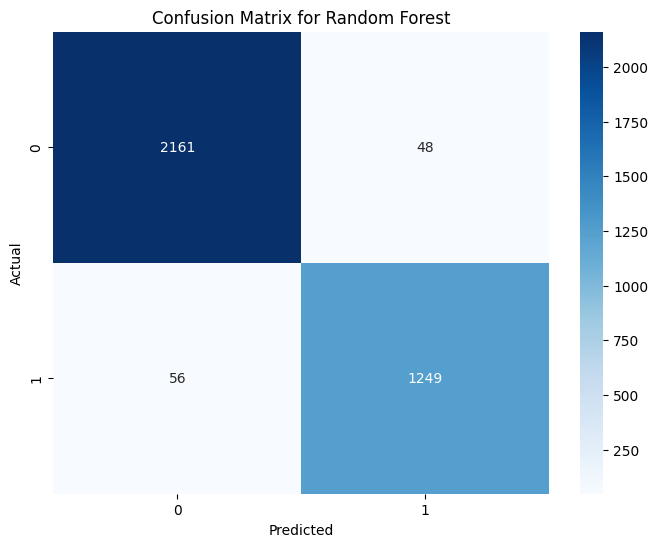

In [ ]:
for name, (clf, param_grid) in classifiers.items():
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_res, y_train_res)
    best_clf = grid_search.best_estimator_
    best_estimators[name] = best_clf
    # Make predictions
    y_pred = best_clf.predict(X_test)
    y_prob = best_clf.predict_proba(X_test)[:, 1] if hasattr(best_clf, 'predict_proba') else None
    # Compute confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)

    # Print best parameters and performance metrics
    print(f"Best Parameters for {name}:\n", grid_search.best_params_)
    print(f"Confusion Matrix for {name}:\n", confusion)
    print(f"Accuracy Score for {name}: {accuracy:.2f}")
    print(f"Precision for {name}: {precision:.2f}")
    print(f"Recall for {name}: {recall:.2f}")
    print(f"F1 Score for {name}: {f1:.2f}")

    # Plot the confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert performance metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame(performance_metrics)

# Plotting performance metrics
plt.figure(figsize=(15, 8))
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(15, 8))
plt.title('Performance Metrics for Different Classifiers')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()